In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.feature_extraction import DictVectorizer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import add_dummy_feature
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.impute import KNNImputer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score, precision_score, recall_score, ConfusionMatrixDisplay, log_loss, f1_score
from sklearn.linear_model import Perceptron
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier



In [2]:
data=pd.read_csv('train.csv')


In [3]:
data.head()

,id,v_21,v_32,v_15,v_4,v_1,v_8,v_12,v_25,v_20,...,v_2,v_16,v_34,v_35,v_36,v_37,v_38,v_39,v_40,label
0,0,3,6,11,55,1,1,16,5,60,...,-0.3,0.79,1,93,47,1,48,26,0,1
1,1,8,94,12,65,1,4,22,4,173,...,5.4,6.51,6,29,37,25,53,35,7,2
2,2,3,166,10,155,1,1,16,1,309,...,0.6,2.02,1,8,34,4,43,38,2,1
3,3,3,6,13,121,1,1,16,1,6,...,0.6,2.02,7,37,40,27,43,65,0,1
4,4,4,51,18,21,1,17,22,118,168,...,8.4,12.51,16,22,25,25,24,23,1,1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3796 entries, 0 to 3795
Data columns (total 43 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      3796 non-null   int64  
 1   v_21    3796 non-null   int64  
 2   v_32    3796 non-null   int64  
 3   v_15    3796 non-null   int64  
 4   v_4     3796 non-null   int64  
 5   v_1     3796 non-null   int64  
 6   v_8     3796 non-null   int64  
 7   v_12    3796 non-null   int64  
 8   v_25    3796 non-null   int64  
 9   v_20    3796 non-null   int64  
 10  v_18    3796 non-null   int64  
 11  v_3     3796 non-null   int64  
 12  v_11    3796 non-null   int64  
 13  v_14    3796 non-null   int64  
 14  v_26    3796 non-null   int64  
 15  v_27    3796 non-null   int64  
 16  v_30    3796 non-null   int64  
 17  v_9     3796 non-null   int64  
 18  v_31    3796 non-null   int64  
 19  v_28    3796 non-null   int64  
 20  v_13    3796 non-null   int64  
 21  v_33    3796 non-null   int64  
 22  

In [5]:
data.describe()

,id,v_21,v_32,v_15,v_4,v_1,v_8,v_12,v_25,v_20,...,v_2,v_16,v_34,v_35,v_36,v_37,v_38,v_39,v_40,label
count,3796.000000,3796.000000,3796.000000,3796.000000,3796.000000,3796.000000,3796.000000,3796.000000,3796.000000,3796.000000,...,3796.000000,3796.000000,3796.000000,3796.000000,3796.000000,3796.000000,3796.000000,3796.000000,3796.000000,3796.00000
mean,1897.500000,4.817439,70.825606,11.609062,99.329294,0.911486,3.436249,18.970495,97.203372,166.138567,...,2.041333,0.835901,5.341149,50.674658,26.212065,20.837197,31.276607,40.210485,3.278978,0.85432
std,1095.955139,6.166860,56.110329,2.576362,45.017380,0.284079,4.577644,15.010042,79.213308,103.121322,...,2.516779,3.109413,3.507388,29.330820,14.929649,11.984063,17.847942,22.466458,2.618851,0.69866
min,0.000000,3.000000,6.000000,9.000000,9.000000,0.000000,1.000000,16.000000,1.000000,6.000000,...,-0.800000,-4.060000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,948.750000,3.000000,6.000000,10.000000,55.000000,1.000000,1.000000,16.000000,5.000000,60.000000,...,0.500000,-1.700000,3.000000,25.000000,13.000000,11.000000,16.000000,21.750000,1.000000,0.00000
50%,1897.500000,3.000000,89.000000,10.000000,101.000000,1.000000,1.000000,16.000000,110.000000,168.000000,...,1.400000,0.790000,5.000000,50.000000,26.000000,21.000000,31.000000,41.000000,3.000000,1.00000
75%,2846.250000,4.000000,116.000000,12.000000,146.000000,1.000000,3.000000,16.000000,181.000000,251.000000,...,2.800000,2.020000,8.000000,76.000000,39.000000,31.000000,47.000000,59.000000,5.000000,1.00000
max,3795.000000,61.000000,176.000000,25.000000,176.000000,1.000000,25.000000,179.000000,289.000000,322.000000,...,12.700000,12.510000,18.000000,107.000000,58.000000,49.000000,69.000000,87.000000,14.000000,2.00000


In [6]:
data.isnull().sum()


id       0
v_21     0
v_32     0
v_15     0
v_4      0
v_1      0
v_8      0
v_12     0
v_25     0
v_20     0
v_18     0
v_3      0
v_11     0
v_14     0
v_26     0
v_27     0
v_30     0
v_9      0
v_31     0
v_28     0
v_13     0
v_33     0
v_17     0
v_19     0
v_29     0
v_23     0
v_24     0
v_10     0
v_5      0
v_6      0
v_22     0
v_0      0
v_7      0
v_2      0
v_16     0
v_34     0
v_35     0
v_36     0
v_37     0
v_38     0
v_39     0
v_40     0
label    0
dtype: int64

In [7]:
data.dtypes


id         int64
v_21       int64
v_32       int64
v_15       int64
v_4        int64
v_1        int64
v_8        int64
v_12       int64
v_25       int64
v_20       int64
v_18       int64
v_3        int64
v_11       int64
v_14       int64
v_26       int64
v_27       int64
v_30       int64
v_9        int64
v_31       int64
v_28       int64
v_13       int64
v_33       int64
v_17       int64
v_19       int64
v_29       int64
v_23       int64
v_24       int64
v_10       int64
v_5        int64
v_6        int64
v_22       int64
v_0        int64
v_7      float64
v_2      float64
v_16     float64
v_34       int64
v_35       int64
v_36       int64
v_37       int64
v_38       int64
v_39       int64
v_40       int64
label      int64
dtype: object

In [8]:
x=data.drop(['label'],axis=1)


In [9]:
x.shape


(3796, 42)

In [10]:
y=data.label


In [11]:
y.shape


(3796,)

Text(0, 0.5, 'Count')

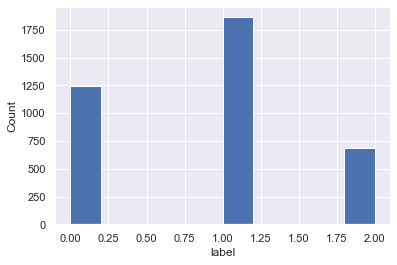

In [12]:
sns.set()
data.label.hist()
plt.xlabel('label')
plt.ylabel('Count')

<AxesSubplot:>

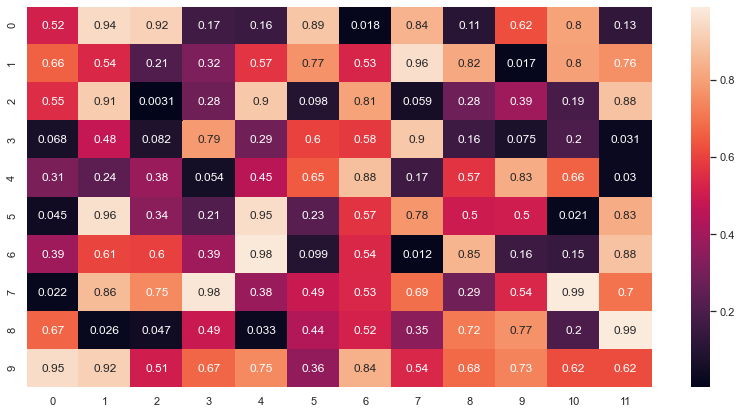

In [13]:
data=np.random.rand(10, 12)
plt.figure(figsize=(14,7))
sns.heatmap(data, annot=True)

In [14]:
X_train, X_test, y_train, y_test = train_test_split(x, y,random_state = 1)


In [ ]:
'''
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostClassifier


model = AdaBoostClassifier(random_state = 1)

modelgrid = GridSearchCV(model,
                        {'n_estimators':[100, 500,1000],
                          'learning_rate':[0.5,1,2]
                          } ,
                        cv = 4, 
                        return_train_score = True)
modelgrid.fit(X_train, y_train)
print (f1_score(y_test, y_pred, average='macro'))
'''

In [ ]:
'''
from sklearn.preprocessing import MinMaxScaler
X = data
mm = MinMaxScaler()
X_normalized = mm.fit_transform(X)
X_normalized[:5]

X_normalized.mean(axis=0)
X_normalized.std(axis=0)
'''

In [ ]:
''''
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100,criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='sqrt', max_leaf_nodes=None, min_impurity_decrease=0.0, bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, class_weight=None, ccp_alpha=0.0, max_samples=None)

rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

print("f1_score:",metrics.f1_score(y_test, y_pred, average='micro'))
'''


In [ ]:
''''
from sklearn.tree import DecisionTreeClassifier

# build a classifier
df = DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, class_weight=None, ccp_alpha=0.0)

#Train the model using the training sets
df.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = df.predict(X_test)
print("f1_score:",metrics.f1_score(y_test, y_pred, average='micro'))

In [ ]:
'''
from sklearn.ensemble import GradientBoostingClassifier
model=GradientBoostingClassifier(loss='deviance', learning_rate=0.1, n_estimators=219, subsample=1, criterion='friedman_mse', min_samples_split=4, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_depth=3, min_impurity_decrease=0.0, init=None, random_state=None, max_features=None, verbose=0, max_leaf_nodes=None, warm_start=False, validation_fraction=0.1, n_iter_no_change=None, tol=0.0001, ccp_alpha=0.0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print (f1_score(y_test, y_pred, average='micro'))
'''

In [15]:
from hyperopt import STATUS_OK, Trials, fmin, hp, tpe


In [16]:
space={'max_depth': hp.quniform("max_depth", 3, 18, 1),
        'gamma': hp.uniform ('gamma', 1,9),
        'reg_alpha' : hp.quniform('reg_alpha', 40,180,1),
        'reg_lambda' : hp.uniform('reg_lambda', 0,1),
        'colsample_bytree' : hp.uniform('colsample_bytree', 0.5,1),
        'min_child_weight' : hp.quniform('min_child_weight', 0, 10, 1),
        'n_estimators': 180,
        'seed': 0
    }

In [17]:
def objective(space):
    clf=xgb.XGBClassifier(
                    n_estimators =space['n_estimators'], max_depth = int(space['max_depth']), gamma = space['gamma'],
                    reg_alpha = int(space['reg_alpha']),min_child_weight=int(space['min_child_weight']),
                    colsample_bytree=int(space['colsample_bytree']))
    
    evaluation = [( X_train, y_train), ( X_test, y_test)]
    
    clf.fit(X_train, y_train,
            eval_set=evaluation, eval_metric="auc",
            early_stopping_rounds=10,verbose=False)
    

    pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, pred>0.5)
    print ("SCORE:", accuracy)
    return {'loss': -accuracy, 'status': STATUS_OK }

In [18]:
import xgboost as xgb


In [19]:
trials = Trials()

best_hyperparams = fmin(fn = objective,
                        space = space,
                        algo = tpe.suggest,
                        max_evals = 100,
                        trials = trials)

SCORE:                                                 
0.6301369863013698                                     
SCORE:                                                 
0.6469968387776607                                                                
  2%|▏         | 2/100 [00:00<00:07, 12.34trial/s, best loss: -0.6469968387776607]

/Users/rahulbhutani/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/Users/rahulbhutani/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

/Users/rahulbhutani/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/Users/rahulbhutani/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                            
0.6343519494204426                                                                
SCORE:                                                                            
0.6364594309799789                                                                
SCORE:                                                                            
0.6522655426765016                                                                
  4%|▍         | 4/100 [00:00<00:07, 12.99trial/s, best loss: -0.6469968387776607]

/Users/rahulbhutani/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/Users/rahulbhutani/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

/Users/rahulbhutani/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/Users/rahulbhutani/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                            
0.6469968387776607                                                                
SCORE:                                                                            
0.6238145416227608                                                                
  6%|▌         | 6/100 [00:00<00:07, 11.77trial/s, best loss: -0.6522655426765016]

/Users/rahulbhutani/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/Users/rahulbhutani/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

/Users/rahulbhutani/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/Users/rahulbhutani/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                            
0.6649104320337197                                                                
SCORE:                                                                            
0.6680716543730242                                                                
  8%|▊         | 8/100 [00:00<00:09, 10.12trial/s, best loss: -0.6649104320337197]

/Users/rahulbhutani/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/Users/rahulbhutani/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

/Users/rahulbhutani/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/Users/rahulbhutani/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                            
0.667017913593256                                                                 
SCORE:                                                                             
0.6469968387776607                                                                 
SCORE:                                                                             
0.6396206533192834                                                                 
 12%|█▏        | 12/100 [00:01<00:09,  9.50trial/s, best loss: -0.6680716543730242]

/Users/rahulbhutani/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/Users/rahulbhutani/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

/Users/rahulbhutani/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/Users/rahulbhutani/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                             
0.6564805057955743                                                                 
SCORE:                                                                             
0.6680716543730242                                                                 
 14%|█▍        | 14/100 [00:01<00:09,  9.41trial/s, best loss: -0.6680716543730242]

/Users/rahulbhutani/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/Users/rahulbhutani/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

/Users/rahulbhutani/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/Users/rahulbhutani/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                             
0.6406743940990516                                                                 
SCORE:                                                                             
0.6301369863013698                                                                 
SCORE:                                                                             
0.6417281348788199                                                                 
 16%|█▌        | 16/100 [00:01<00:08, 10.38trial/s, best loss: -0.6680716543730242]

/Users/rahulbhutani/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/Users/rahulbhutani/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

/Users/rahulbhutani/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/Users/rahulbhutani/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                             
0.649104320337197                                                                  
SCORE:                                                                             
0.6501580611169653                                                                 
SCORE:                                                                             
0.6364594309799789                                                                 
 20%|██        | 20/100 [00:01<00:06, 11.68trial/s, best loss: -0.6680716543730242]

/Users/rahulbhutani/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/Users/rahulbhutani/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

/Users/rahulbhutani/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/Users/rahulbhutani/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                             
0.6564805057955743                                                                 
SCORE:                                                                             
0.6533192834562698                                                                 
 22%|██▏       | 22/100 [00:02<00:07, 11.02trial/s, best loss: -0.6680716543730242]

/Users/rahulbhutani/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/Users/rahulbhutani/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

/Users/rahulbhutani/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/Users/rahulbhutani/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                             
0.6712328767123288                                                                 
SCORE:                                                                             
0.672286617492097                                                                  
 24%|██▍       | 24/100 [00:02<00:09,  8.37trial/s, best loss: -0.672286617492097] 

/Users/rahulbhutani/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/Users/rahulbhutani/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

/Users/rahulbhutani/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/Users/rahulbhutani/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                            
0.6543730242360379                                                                
SCORE:                                                                            
0.6712328767123288                                                                
 26%|██▌       | 26/100 [00:02<00:09,  8.05trial/s, best loss: -0.672286617492097]

/Users/rahulbhutani/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/Users/rahulbhutani/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

/Users/rahulbhutani/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/Users/rahulbhutani/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                            
0.6480505795574288                                                                
SCORE:                                                                            
0.672286617492097                                                                 
 28%|██▊       | 28/100 [00:03<00:09,  7.47trial/s, best loss: -0.672286617492097]

/Users/rahulbhutani/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/Users/rahulbhutani/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

/Users/rahulbhutani/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/Users/rahulbhutani/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                            
0.6617492096944152                                                                
SCORE:                                                                            
0.6680716543730242                                                                
 30%|███       | 30/100 [00:03<00:10,  6.77trial/s, best loss: -0.672286617492097]

/Users/rahulbhutani/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/Users/rahulbhutani/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

/Users/rahulbhutani/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/Users/rahulbhutani/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                            
0.6649104320337197                                                                
SCORE:                                                                            
0.6543730242360379                                                                
SCORE:                                                                            
0.6512118018967334                                                                
 33%|███▎      | 33/100 [00:03<00:08,  7.82trial/s, best loss: -0.672286617492097]

/Users/rahulbhutani/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/Users/rahulbhutani/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

/Users/rahulbhutani/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/Users/rahulbhutani/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                            
0.672286617492097                                                                 
SCORE:                                                                            
0.6617492096944152                                                                
 35%|███▌      | 35/100 [00:04<00:09,  6.89trial/s, best loss: -0.672286617492097]

/Users/rahulbhutani/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/Users/rahulbhutani/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

/Users/rahulbhutani/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/Users/rahulbhutani/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                            
0.6459430979978925                                                                
SCORE:                                                                            
0.667017913593256                                                                 
 37%|███▋      | 37/100 [00:04<00:09,  6.89trial/s, best loss: -0.672286617492097]

/Users/rahulbhutani/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/Users/rahulbhutani/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

/Users/rahulbhutani/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/Users/rahulbhutani/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                            
0.6638566912539515                                                                
SCORE:                                                                            
0.6659641728134879                                                                
 39%|███▉      | 39/100 [00:04<00:10,  6.09trial/s, best loss: -0.672286617492097]

/Users/rahulbhutani/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/Users/rahulbhutani/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

/Users/rahulbhutani/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/Users/rahulbhutani/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                            
0.6438356164383562                                                                
SCORE:                                                                            
0.6459430979978925                                                                
SCORE:                                                                            
0.6543730242360379                                                                
 42%|████▏     | 42/100 [00:04<00:07,  7.97trial/s, best loss: -0.672286617492097]

/Users/rahulbhutani/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/Users/rahulbhutani/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

/Users/rahulbhutani/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/Users/rahulbhutani/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                            
0.6680716543730242                                                                
SCORE:                                                                            
0.6533192834562698                                                                
 44%|████▍     | 44/100 [00:05<00:07,  7.65trial/s, best loss: -0.672286617492097]

/Users/rahulbhutani/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/Users/rahulbhutani/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

/Users/rahulbhutani/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/Users/rahulbhutani/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                            
0.6680716543730242                                                                
SCORE:                                                                            
0.667017913593256                                                                 
 46%|████▌     | 46/100 [00:05<00:08,  6.59trial/s, best loss: -0.672286617492097]

/Users/rahulbhutani/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/Users/rahulbhutani/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

/Users/rahulbhutani/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/Users/rahulbhutani/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                            
0.6343519494204426                                                                
SCORE:                                                                            
0.6564805057955743                                                                
SCORE:                                                                            
0.6480505795574288                                                                
 48%|████▊     | 48/100 [00:05<00:06,  7.88trial/s, best loss: -0.672286617492097]

/Users/rahulbhutani/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/Users/rahulbhutani/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

/Users/rahulbhutani/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/Users/rahulbhutani/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                            
0.6343519494204426                                                                
SCORE:                                                                            
0.6469968387776607                                                                
 51%|█████     | 51/100 [00:06<00:05,  8.77trial/s, best loss: -0.672286617492097]

/Users/rahulbhutani/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/Users/rahulbhutani/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

/Users/rahulbhutani/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/Users/rahulbhutani/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                            
0.6659641728134879                                                                
SCORE:                                                                            
0.6691253951527925                                                                
 53%|█████▎    | 53/100 [00:06<00:06,  7.13trial/s, best loss: -0.672286617492097]

/Users/rahulbhutani/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/Users/rahulbhutani/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

/Users/rahulbhutani/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/Users/rahulbhutani/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                            
0.672286617492097                                                                 
SCORE:                                                                            
0.6301369863013698                                                                
SCORE:                                                                            
0.642781875658588                                                                 
 56%|█████▌    | 56/100 [00:06<00:05,  7.77trial/s, best loss: -0.672286617492097]

/Users/rahulbhutani/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/Users/rahulbhutani/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

/Users/rahulbhutani/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/Users/rahulbhutani/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                            
0.6406743940990516                                                                
SCORE:                                                                            
0.6543730242360379                                                                
 57%|█████▋    | 57/100 [00:07<00:05,  8.10trial/s, best loss: -0.672286617492097]


/Users/rahulbhutani/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

/Users/rahulbhutani/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/Users/rahulbhutani/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                            
0.6659641728134879                                                                
 59%|█████▉    | 59/100 [00:07<00:05,  7.75trial/s, best loss: -0.672286617492097]

/Users/rahulbhutani/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/Users/rahulbhutani/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

/Users/rahulbhutani/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/Users/rahulbhutani/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                            
0.6617492096944152                                                                
SCORE:                                                                            
0.642781875658588                                                                 
SCORE:                                                                            
0.6543730242360379                                                                
 62%|██████▏   | 62/100 [00:07<00:04,  8.17trial/s, best loss: -0.672286617492097]

/Users/rahulbhutani/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/Users/rahulbhutani/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

/Users/rahulbhutani/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/Users/rahulbhutani/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                            
0.6512118018967334                                                                
SCORE:                                                                            
0.6712328767123288                                                                
 64%|██████▍   | 64/100 [00:07<00:04,  7.76trial/s, best loss: -0.672286617492097]

/Users/rahulbhutani/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/Users/rahulbhutani/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

/Users/rahulbhutani/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/Users/rahulbhutani/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                            
0.6659641728134879                                                                
SCORE:                                                                            
0.6680716543730242                                                                
 66%|██████▌   | 66/100 [00:08<00:05,  6.69trial/s, best loss: -0.672286617492097]

/Users/rahulbhutani/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/Users/rahulbhutani/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

/Users/rahulbhutani/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/Users/rahulbhutani/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                            
0.6501580611169653                                                                
SCORE:                                                                            
0.6680716543730242                                                                
 68%|██████▊   | 68/100 [00:08<00:04,  6.71trial/s, best loss: -0.672286617492097]

/Users/rahulbhutani/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/Users/rahulbhutani/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

/Users/rahulbhutani/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/Users/rahulbhutani/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                            
0.6659641728134879                                                                
SCORE:                                                                            
0.667017913593256                                                                 
 70%|███████   | 70/100 [00:08<00:04,  6.01trial/s, best loss: -0.672286617492097]

/Users/rahulbhutani/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/Users/rahulbhutani/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

/Users/rahulbhutani/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/Users/rahulbhutani/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                            
0.6564805057955743                                                                
SCORE:                                                                            
0.6564805057955743                                                                
 71%|███████   | 71/100 [00:09<00:04,  6.78trial/s, best loss: -0.672286617492097]

/Users/rahulbhutani/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/Users/rahulbhutani/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

/Users/rahulbhutani/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/Users/rahulbhutani/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                            
0.6733403582718651                                                                
SCORE:                                                                             
0.6512118018967334                                                                 
SCORE:                                                                             
0.6564805057955743                                                                 
 74%|███████▍  | 74/100 [00:09<00:03,  7.48trial/s, best loss: -0.6733403582718651]

/Users/rahulbhutani/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/Users/rahulbhutani/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

/Users/rahulbhutani/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/Users/rahulbhutani/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                             
0.6680716543730242                                                                 
SCORE:                                                                             
0.667017913593256                                                                  
 77%|███████▋  | 77/100 [00:09<00:03,  6.82trial/s, best loss: -0.6733403582718651]

/Users/rahulbhutani/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/Users/rahulbhutani/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

/Users/rahulbhutani/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/Users/rahulbhutani/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                             
0.6680716543730242                                                                 
SCORE:                                                                             
0.667017913593256                                                                  
 79%|███████▉  | 79/100 [00:10<00:03,  6.16trial/s, best loss: -0.6733403582718651]

/Users/rahulbhutani/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/Users/rahulbhutani/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

/Users/rahulbhutani/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/Users/rahulbhutani/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                             
0.6543730242360379                                                                 
SCORE:                                                                             
0.6301369863013698                                                                 
SCORE:                                                                             
0.6564805057955743                                                                 
 82%|████████▏ | 82/100 [00:10<00:02,  7.79trial/s, best loss: -0.6733403582718651]

/Users/rahulbhutani/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/Users/rahulbhutani/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

/Users/rahulbhutani/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/Users/rahulbhutani/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                             
0.6659641728134879                                                                 
 83%|████████▎ | 83/100 [00:10<00:02,  6.92trial/s, best loss: -0.6733403582718651]

/Users/rahulbhutani/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/Users/rahulbhutani/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

/Users/rahulbhutani/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/Users/rahulbhutani/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                             
0.6691253951527925                                                                 
SCORE:                                                                             
0.6564805057955743                                                                 
SCORE:                                                                             
0.589041095890411                                                                  
 86%|████████▌ | 86/100 [00:11<00:01,  7.55trial/s, best loss: -0.6733403582718651]

/Users/rahulbhutani/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/Users/rahulbhutani/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

/Users/rahulbhutani/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/Users/rahulbhutani/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                             
0.667017913593256                                                                  
 87%|████████▋ | 87/100 [00:11<00:01,  6.74trial/s, best loss: -0.6733403582718651]

/Users/rahulbhutani/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/Users/rahulbhutani/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

/Users/rahulbhutani/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/Users/rahulbhutani/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                             
0.6691253951527925                                                                 
SCORE:                                                                             
0.6469968387776607                                                                 
SCORE:                                                                             
0.6238145416227608                                                                 
 90%|█████████ | 90/100 [00:11<00:01,  7.49trial/s, best loss: -0.6733403582718651]

/Users/rahulbhutani/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/Users/rahulbhutani/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

/Users/rahulbhutani/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/Users/rahulbhutani/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                             
0.6512118018967334                                                                 
SCORE:                                                                             
0.6469968387776607                                                                 
 92%|█████████▏| 92/100 [00:11<00:00,  8.20trial/s, best loss: -0.6733403582718651]

/Users/rahulbhutani/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/Users/rahulbhutani/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

/Users/rahulbhutani/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/Users/rahulbhutani/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                             
0.6543730242360379                                                                 
 93%|█████████▎| 93/100 [00:12<00:00,  8.32trial/s, best loss: -0.6733403582718651]

/Users/rahulbhutani/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/Users/rahulbhutani/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

/Users/rahulbhutani/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/Users/rahulbhutani/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                             
0.667017913593256                                                                  
SCORE:                                                                             
0.6533192834562698                                                                 
 95%|█████████▌| 95/100 [00:12<00:00,  7.48trial/s, best loss: -0.6733403582718651]

/Users/rahulbhutani/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/Users/rahulbhutani/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

/Users/rahulbhutani/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/Users/rahulbhutani/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                             
0.660695468914647                                                                  
SCORE:                                                                             
0.6638566912539515                                                                 
 97%|█████████▋| 97/100 [00:12<00:00,  6.29trial/s, best loss: -0.6733403582718651]

/Users/rahulbhutani/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/Users/rahulbhutani/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

/Users/rahulbhutani/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/Users/rahulbhutani/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                             
0.6543730242360379                                                                 
SCORE:                                                                             
0.667017913593256                                                                  
 99%|█████████▉| 99/100 [00:12<00:00,  6.63trial/s, best loss: -0.6733403582718651]

/Users/rahulbhutani/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/Users/rahulbhutani/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

/Users/rahulbhutani/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/Users/rahulbhutani/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                             
0.6691253951527925                                                                 
100%|██████████| 100/100 [00:13<00:00,  7.59trial/s, best loss: -0.6733403582718651]


In [ ]:
print("The best hyperparameters are : ","\n")
print(best_hyperparams)

In [15]:
model=XGBClassifier(colsample_bytree=0.51, gamma=2.98, max_depth=8, min_child_weight=4, reg_alpha=4, reg_lambda=0.85)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print (f1_score(y_test, y_pred, average='micro'))

0.7523709167544784


In [ ]:
'''X_test_n=pd.read_csv('../input/students-drop-out-prediction/test.csv')
y_pred = model.predict(X_test_n)
final = pd.DataFrame(y_pred, columns = ['label'])
final = final.rename_axis('id')                    
final.to_csv('submission.csv')'''